<a href="https://colab.research.google.com/github/aka-hombre/MAT421/blob/main/HWHii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HW Module G: Section 22.4, 22.5, 22.6**#

---




##22.4 - Numerical Error and Instability##

Using integration schemes to approximate ODEs, runs into two main problems: accuracy and stability. Accuracy, is the integration schemes' ability to get close to the exact solution, denoted in Big-Oh notation. Stability refres to how the integration scheme keeps error from growing, as it integrates. If error does not grow, the technique is stable, otherwise it is unstable. Some techniques are stable for certain choices of h and unstable for others; these integration schemes are also referred to as unstable.

Let's illustrate this concept by solving the pendulum equation over time $[0,5]$ with incriments $0.1$ and initial condition, $\begin{bmatrix}0 \\1 \end{bmatrix}$, using three diffrent integration schemes: Euler's Implicit, Euler's Explicit, and trapazoidal.

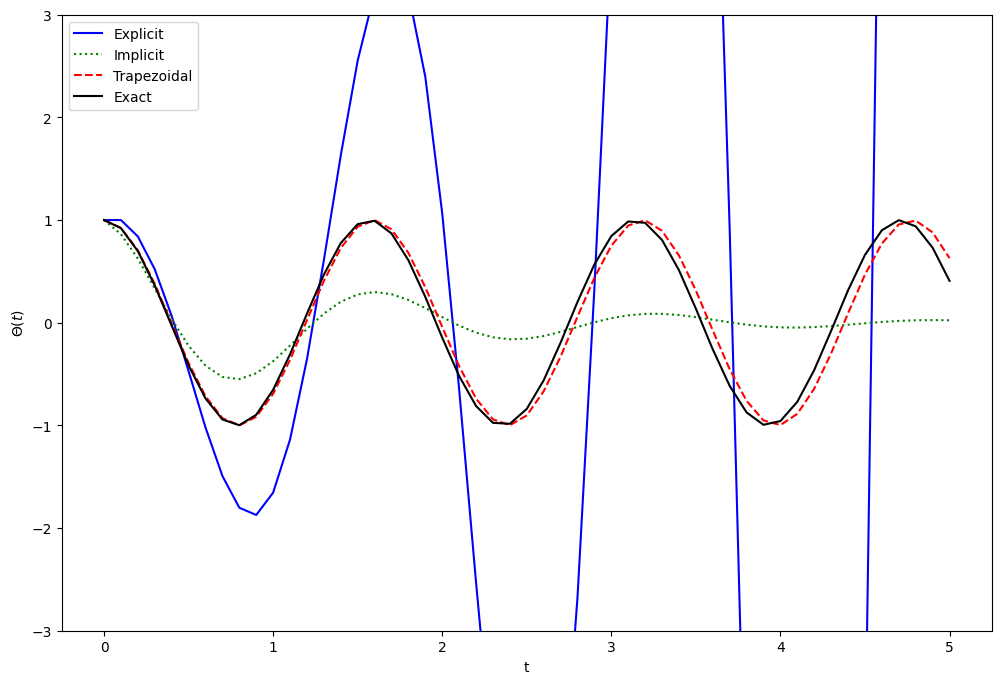

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt


# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()



Now notice, how the stability of our system changes with more ossicilations of the pendulum.

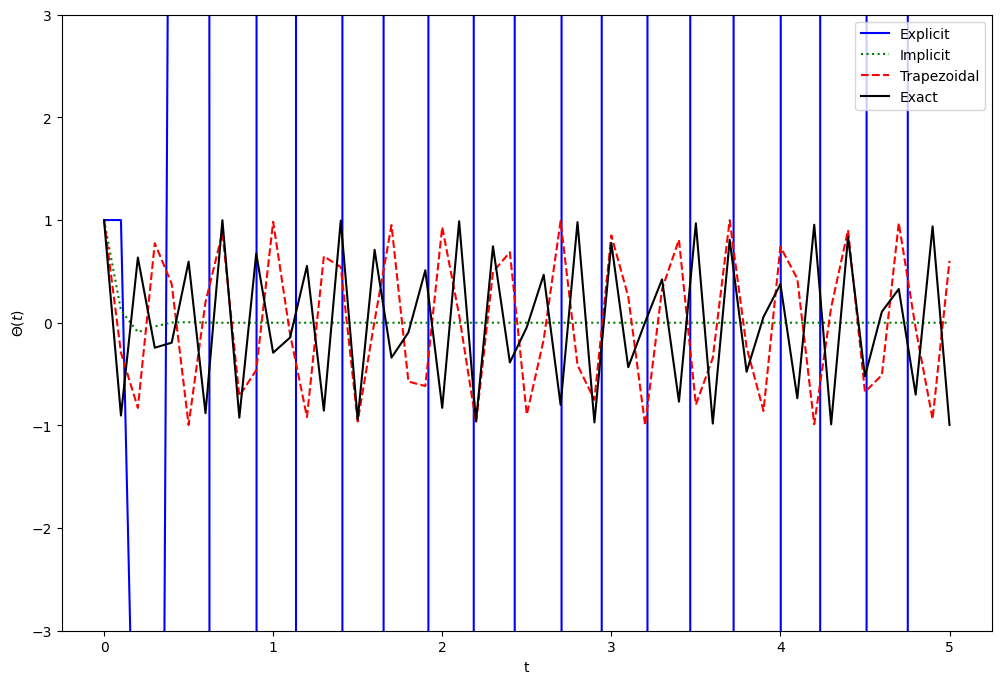

In [3]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt


# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 27
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()



##22.4 - Predictor-Corrector Mehtods##

As seen before, using integration schemes can lead to error ispecially if the schme is unstable. This is where a predictor-corrector scheme comes into play. Typically a prediction of the value of the ode is made at a time using one of the above ode solving techniques, then a second formula the 'corrector" formula is applied to correct the estimation.

An example of this is the **midpoint method**. The predictor step is:
\begin{equation}
S(t_j + \frac{h}{2}) = S(t_j) + \frac{h}{2}F(t_j,S(t_j))
\end{equation}

This predicts the solution of an ODE, mid point between $t_j$ and $t_{j+1}$. Here is the correction step:
\begin{align}
S(t_{j+1})  = S(t_j) + \frac{h}{2}F(t_j + \frac{h}{2},S(t_j + \frac{h}{2}))
\end{align}

##Runge Kutta Methods##

This is a popular choice for a predictor-correction scheme. Let's try it on: $\frac{dy}{dt} = y$, with $y_0 = 1$, the analytical solution is $y = e^t$

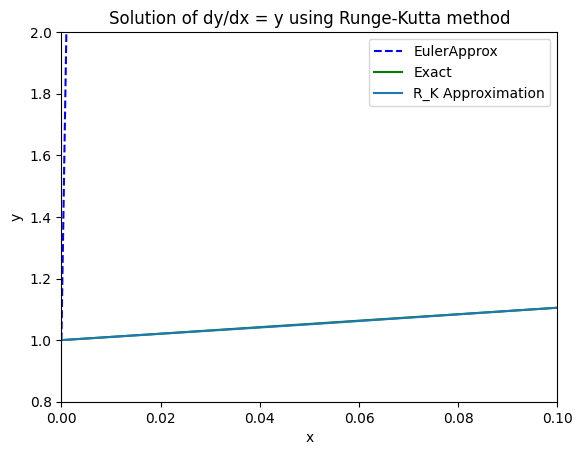

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def dydx(x, y):
    return y

def runge_kutta(x0, y0, x_end, steps):

    # Initializing arrays to store x and y values
    x = np.linspace(x0, x_end, steps + 1)
    y = np.zeros(steps + 1)
    y[0] = y0

    h = (x_end - x0) / steps # step size

    for i in range(1, steps + 1):
        k1 = h * dydx(x[i-1], y[i-1])
        k2 = h * dydx(x[i-1] + 0.5 * h, y[i-1] + 0.5 * k1)
        k3 = h * dydx(x[i-1] + 0.5 * h, y[i-1] + 0.5 * k2)
        k4 = h * dydx(x[i-1] + h, y[i-1] + k3)

        y[i] = y[i-1] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)

    return x, y

# Initial conditions
x0 = 0
y0 = 1  # Given y(0) = 1


# Parameters
x_end = 5
h = 100

# Solving the ODE w/ runge/kuta
x_vals, y_vals = runge_kutta(x0, y0, x_end, h)

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = y0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*dydx(t[i], s[i])

# Plotting the solution
plt.plot(t, s, 'b--', label='EulerApprox')
plt.plot(t, np.exp(t), 'g', label='Exact')
plt.plot(x_vals, y_vals, label="R_K Approximation")
plt.title("Solution of dy/dx = y using Runge-Kutta method")
plt.xlabel("x")
plt.ylabel("y")

plt.xlim(0, .1)
plt.ylim(0.8, 2)

plt.legend()
plt.show()
